In [7]:
def delta(A, Z):
    """Delta pair function used for calculating pairing energy"""
    if (A-Z)%2 and Z%2:
        return -1
    
    if not (A-Z)%2 and not Z%2:
        return 1
    
    return 0

lowest_nucleon_energy_list = []

#For each A
for A in range(1, 262):
    highest_binding_energy = 0
    highest_binding_energy_Z = 1
    
    #Calculate the binding energy for a range of Z centered around A/2
    for Z in range (int(A/2) - 3, int(A/2) + 3):
        if Z > 0 and Z < A:
            
            #Calculate components of binding energy from liquid drop model
            volume_energy = 15.75 * A

            surface_energy = -17.8 * (A**(2/3))
            
            if Z == 1:
                coulomb_energy = 0
            else:
                coulomb_energy = -0.711 * (Z**2) / (A**(1/3))
            
            if A <= 3:
                asymmetry_energy = 0
            else:
                asymmetry_energy = -23.7 * ((A - 2*Z)**2) / A

            if A == 2:
                pairing_energy = 0    
            else:
                pairing_energy = 11.8 * delta(A,Z) / (A**(1/2))

            binding_energy = volume_energy
            binding_energy += surface_energy
            binding_energy += coulomb_energy
            binding_energy += asymmetry_energy
            binding_energy += pairing_energy
            
            #The Z with the highest binding energy is the most stable nucleon
            if binding_energy > highest_binding_energy:
                highest_binding_energy = binding_energy
                highest_binding_energy_Z = Z
    
    #Add the A, Z, and binding energy per nucleon to a dictionary
    lowest_nucleon_energy_list.append({"A": A, "Z": highest_binding_energy_Z,
                                       "Binding Energy per nucleon": highest_binding_energy / A})

for nucleon in lowest_nucleon_energy_list:
    print(nucleon)

{'A': 1, 'Z': 1, 'Binding Energy per nucleon': 0.0}
{'A': 2, 'Z': 1, 'Binding Energy per nucleon': 1.6221306374830249}
{'A': 3, 'Z': 1, 'Binding Energy per nucleon': 3.4081693165587006}
{'A': 4, 'Z': 2, 'Binding Energy per nucleon': 5.563800722698}
{'A': 5, 'Z': 2, 'Binding Energy per nucleon': 4.0598605940631005}
{'A': 6, 'Z': 3, 'Binding Energy per nucleon': 4.564476621875991}
{'A': 7, 'Z': 3, 'Binding Energy per nucleon': 5.483359414136749}
{'A': 8, 'Z': 4, 'Binding Energy per nucleon': 6.66049125112508}
{'A': 9, 'Z': 4, 'Binding Energy per nucleon': 6.292392137960596}
{'A': 10, 'Z': 4, 'Binding Energy per nucleon': 6.385093494357333}
{'A': 11, 'Z': 5, 'Binding Energy per nucleon': 6.823879126513709}
{'A': 12, 'Z': 6, 'Binding Energy per nucleon': 7.327324180557244}
{'A': 13, 'Z': 6, 'Binding Energy per nucleon': 7.202230698128904}
{'A': 14, 'Z': 6, 'Binding Energy per nucleon': 7.347553432263067}
{'A': 15, 'Z': 7, 'Binding Energy per nucleon': 7.4853521415916475}
{'A': 16, 'Z': 8, 

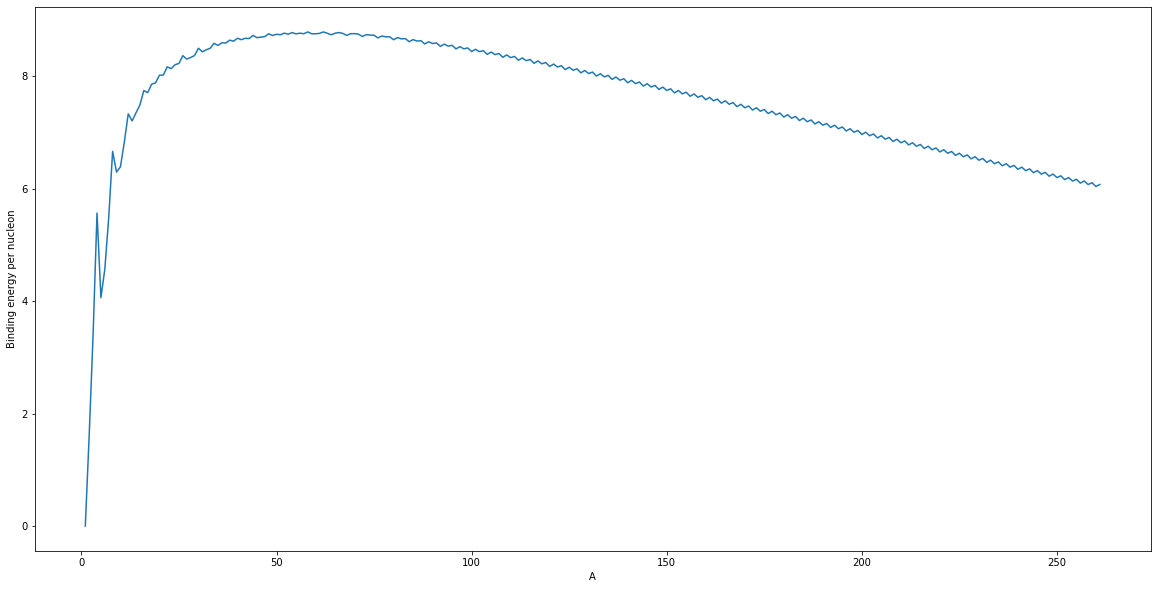

In [6]:
#Graph data calculated above

import matplotlib.pyplot as plt

A_list = []
nucleon_binding_energy_list = []
for nucleon in lowest_nucleon_energy_list:
    A_list.append(nucleon["A"])
    nucleon_binding_energy_list.append(nucleon["Binding Energy per nucleon"])
    
plt.figure(figsize=(20,10))
plt.plot(A_list, nucleon_binding_energy_list)
plt.ylabel("Binding energy per nucleon")
plt.xlabel("A")
plt.show()